In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Model Stacking Classification example

In [2]:
# Column names to be used for training and testing sets-
col_names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'Class']

# Read in training and testing datasets-
training_data = pd.read_csv("shuttle_training.csv", delimiter = ' ', names = col_names)

In [3]:
# Training data dimension-
training_data.shape

(43500, 10)

In [4]:
# Check training data for missing values-
training_data.isnull().values.any()

False

In [5]:
# To get distribution of unique values for attribute 'Class'-
training_data["Class"].value_counts()

1    34108
4     6748
5     2458
3      132
2       37
7       11
6        6
Name: Class, dtype: int64

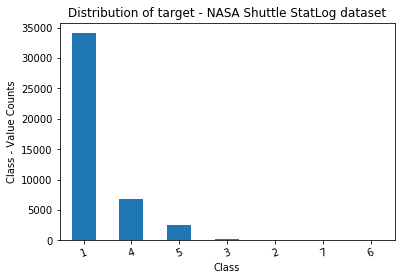

In [8]:
# To visualize a categorical attribute 'Class' in training data-
training_data["Class"].value_counts().plot(kind = 'bar')

plt.title("Distribution of target - NASA Shuttle StatLog dataset")
plt.xlabel("Class")
plt.ylabel("Class - Value Counts")
plt.xticks(rotation = 20)
plt.show()

### Observation:
We can see that the target attribute distribution is highly skewed! Maybe some further strategies will be required for handling of skewed dataset down the line.

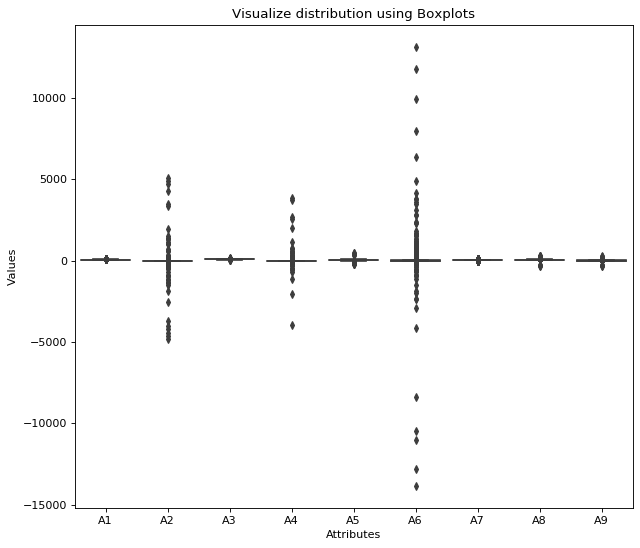

In [12]:
fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')

sns.boxplot(data = training_data.iloc[:, :-1])
plt.title("Visualize distribution using Boxplots")
plt.xlabel("Attributes")
plt.ylabel("Values")
plt.show()

In [13]:
# To divide the data into attributes and labels, execute the following code:

# 'X' contains attributes
X = training_data.drop('Class', axis = 1)

# Convert 'X' to float-
X = X.values.astype("float")

# 'y' contains labels
y = training_data['Class']

In [16]:
# Standardize Features-
scaler = StandardScaler()
# mm_scaler = MinMaxScaler()

# Standardize features (X)-
X_std = scaler.fit_transform(X)
# X_std = mm_scaler.fit_transform(X)

In [17]:
# Divide attributes & labels into training & testing sets-
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.30)

print("\nDimensions of training and testing sets are:")
print("X_train = {0}, y_train = {1}, X_test = {2} and y_test = {3}\n\n".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))


Dimensions of training and testing sets are:
X_train = (30450, 9), y_train = (30450,), X_test = (13050, 9) and y_test = (13050,)




In [18]:
# Using Support Vector Machine (SVM) for multi-class classification-
svm_clf = svm.SVC(decision_function_shape = 'ovr') # or 'ovo'

svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
# Make predictions using trained model-
y_pred = svm_clf.predict(X_test)

In [23]:
# Class labels NOT predicted by SVM classifier-
set(y_test) - set(y_pred)

{6, 7}

In [24]:
set(y_test), set(y_pred)

({1, 2, 3, 4, 5, 6, 7}, {1, 2, 3, 4, 5})

In [20]:
# Get model metrics-
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

/home/arjun/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
print("\nSupport Vector Machine classifier model metrics are:")
print("accuracy = {0:.4f}, precision = {1:.4f} & recall = {2:.4f}\n".format(accuracy, precision, recall))


Support Vector Machine classifier model metrics are:
accuracy = 0.9970, precision = 0.7128 & recall = 0.5663



In [28]:
svm_clf.decision_function_shape

'ovr'

In [29]:
# Using Decision Tree classifier-
dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
# Make predictions using trained DT classifier-
y_pred_dt = dt_clf.predict(X_test)

In [31]:
# Get model metrics-
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='macro')
recall = recall_score(y_test, y_pred_dt, average='macro')

In [32]:
print("\nDecision Tree classifier model metrics are:")
print("accuracy = {0:.4f}, precision = {1:.4f} & recall = {2:.4f}\n".format(accuracy, precision, recall))


Decision Tree classifier model metrics are:
accuracy = 0.9997, precision = 0.9250 & recall = 0.9961



### Observation:
We can see that a Decision Tree classifier does much better than a Support Vector Machine classifier!

In [33]:
# Using k-Nearest Neighbors classifier-

# Specify parameters for GridSearchCV-
params = {
    'n_neighbors': [3, 5, 7],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [36]:
# Use 5-fold CV using Grid Search-
knn_grid = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=params,
    cv = 5)

In [37]:
# Train on training data-
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [40]:
# Get 'best' accuracy score-
knn_grid.best_score_

0.9984893267651888

In [41]:
# Get 'best' parameters-
knn_grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### Train 'best' KNN classifier using parameters from above-

In [43]:
knn_clf = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='minkowski')

In [44]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [45]:
y_pred_knn = knn_clf.predict(X_test)

In [46]:
# Get model metrics-
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='macro')
recall = recall_score(y_test, y_pred_knn, average='macro')

In [47]:
print("\nKNN 'best' classifier model metrics are:")
print("accuracy = {0:.4f}, precision = {1:.4f} & recall = {2:.4f}\n".format(accuracy, precision, recall))


KNN 'best' classifier model metrics are:
accuracy = 0.9986, precision = 0.7828 & recall = 0.9878



### Observation:
We can again observe that, so far, Decision Tree classifier has performed the best for the given dataset

In [59]:
# Using Logistic Regression classifier-

# Initialize base logistic regression classifier-
lr_clf = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', max_iter = 5000)

# Train base model on training data-
lr_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
# Make base predictions using trained base model-
y_pred_lr = lr_clf.predict(X_test)

In [62]:
# Get model metrics-
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='macro')
recall = recall_score(y_test, y_pred_lr, average='macro')

/home/arjun/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
# Get class labels NOT predicted by Logistic Regression classifier-
set(y_test) - set(y_pred_lr)

{2}

In [64]:
print("\nLogistic Regression classifier model metrics are:")
print("accuracy = {0:.4f}, precision = {1:.4f} & recall = {2:.4f}\n".format(accuracy, precision, recall))


Logistic Regression classifier model metrics are:
accuracy = 0.9660, precision = 0.6554 & recall = 0.7198



## Using stacked classifier:
Creating a single layer stacking architecture

In [51]:
# Create base learners-
base_classifiers = [
    # ('rfc', RandomForestClassifier(n_estimators=20)),
    ('knn_clf', KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='minkowski')),
    ('dt_clf', DecisionTreeClassifier()),
    ('svm_clf', svm.SVC(decision_function_shape = 'ovr'))
]

In [52]:
# Initialize sklearn stacking classifier with a meta learner-
stacking_clf = StackingClassifier(
    estimators = base_classifiers,
    final_estimator = RandomForestClassifier(n_estimators = 100),
    cv = 5)


In [53]:
# Train stacked model on training data-
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('knn_clf',
                                KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=3,
                                                     p=2, weights='uniform')),
                               ('dt_clf',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
        

In [54]:
# Get score of trained stacked classifier on testing data-
stacking_clf.score(X_test, y_test)

0.9999233716475096

In [77]:
# Make predictions using trained stacked classifier-
y_pred = stacking_clf.predict(X_test)

In [56]:
# Get model metrics-
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("\nStacked classifier model metrics are:")
print("accuracy = {0:.4f}, precision = {1:.4f} & recall = {2:.4f}\n".format(accuracy, precision, recall))


Stacked classifier model metrics are:
accuracy = 0.9999, precision = 0.9999 & recall = 0.9964



In [78]:
# confusion matrix results-
confusion_matrix(y_test, y_pred)

array([[10237,     0,     0,     0,     0,     0,     0],
       [    0,    13,     0,     0,     0,     0,     0],
       [    0,     0,    39,     1,     0,     0,     0],
       [    0,     0,     0,  2031,     0,     0,     0],
       [    0,     0,     0,     0,   727,     0,     0],
       [    0,     0,     0,     0,     0,     1,     0],
       [    0,     0,     0,     0,     0,     0,     1]])

### Observation:
Using stacked classifier has improved precision, recall and accuracy metrics for classification task!

## Using multi-layer stacking:
Let's see whether we can improve the metrics from above further using multi-layer stacking

In [69]:
# Create classification models for each layers-
layer_one_estimators = [
    ('dt_clf', DecisionTreeClassifier()),
    ('knn_clf', KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='minkowski'))
]

layer_two_estimators = [
    ('svm_clf', svm.SVC(decision_function_shape = 'ovr')),
    ('lr_clf', LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', max_iter = 5000))
]

In [70]:
layer_two = StackingClassifier(
    estimators = layer_two_estimators,
    final_estimator = RandomForestClassifier(n_estimators = 100))

In [71]:
# Create Final model by 
clf = StackingClassifier(
    estimators = layer_one_estimators,
    final_estimator = layer_two)

In [72]:
# Train two layered stacked classifier-
clf.fit(X_train, y_train)

StackingClassifier(cv=None,
                   estimators=[('dt_clf',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                 

In [73]:
# Get accuracy score-
clf.score(X_test, y_test)

0.9996168582375479

In [74]:
# Make predictions using trained stacked classifier-
y_pred = clf.predict(X_test)

In [75]:
# Get model metrics-
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("\nTwo-layered Stacked classifier model metrics are:")
print("accuracy = {0:.4f}, precision = {1:.4f} & recall = {2:.4f}\n".format(accuracy, precision, recall))


Two-layered Stacked classifier model metrics are:
accuracy = 0.9996, precision = 0.8433 & recall = 0.8534



/home/arjun/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
# Get class labels NOT predicted by stacked classifier-
set(y_test) - set(y_pred)

{6}

### Takeaway:
1. Increasing number of stacked layers does not necessarily mean an increase in accuracy (for classification)
1. Combination of classifiers within the stacked layer plays an important role in overall performance
1. It would be _ideal_ if the classifiers being used would be hyper-parameter optimized so as to have optimal performance along with using __cross-validation__ to avoid overfitting